In [1]:
# imports
from tueplots import bundles
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tueplots import figsizes

import sys
%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [2]:
from analysis import sweep2df, create_violinplot, format_violin, violin_by_prior

In [3]:
plt.rcParams.update(bundles.neurips2022(usetex=False))

# Data loading

In [4]:
# Constants
ENTITY = "ima-vae"
PROJECT = "priors"
SWEEP_ID = "zoqmui79"


In [6]:
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"mlp_sweep_{SWEEP_ID}.csv"

In [160]:
runs_df = sweep2df(sweep.runs, filename, save=True, load=False)

In [130]:
encoder_extra_layers = [0,2,4]
encoder_extra_width = [0, 15, 30]
lrs = [.003,0.001, 0.0003, 0.0001]
run_encoder_extra_layers = np.array([run.config["model.encoder_extra_layers"] for run in sweep.runs if "model.encoder_extra_layers" in run.config.keys() and run.state == "finished" and 1 / run.config["model.decoder_var"] <= 1e5])
run_encoder_extra_width = np.array([run.config["model.encoder_extra_width"] for run in sweep.runs if "model.encoder_extra_width" in run.config.keys() and run.state == "finished" and 1 / run.config["model.decoder_var"] <= 1e5])

In [74]:
runs_df = runs_df[runs_df.gamma_square <= 1e5]

In [154]:

SWEEP_ID = "2m3kslh7"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"mlp_sweep_{SWEEP_ID}.csv"
runs_df_new = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID helpful-sweep-24
Encountered a faulty run with ID ancient-sweep-23
Encountered a faulty run with ID dazzling-sweep-19
Encountered a faulty run with ID splendid-sweep-15
Encountered a faulty run with ID summer-sweep-16


In [163]:
last_mse_obs = [run.history(keys=[f"Metrics/val/mse_obs_decoded_mean_latents"]
                ).iloc[-1][
                    "Metrics/val/mse_obs_decoded_mean_latents"
                ] for run in sweep.runs]

In [186]:
SWEEP_ID = "h9ezlgwr"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"mlp_sweep_{SWEEP_ID}.csv"
runs_df_longer = sweep2df(sweep.runs, filename, save=True, load=False)

In [205]:

SWEEP_ID = "dn0h77v3"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"mlp_sweep_{SWEEP_ID}.csv"
runs_df_longer_more_seeds = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID astral-sweep-69


In [187]:
last_mse_obs_longer = np.array([run.history(keys=[f"Metrics/val/mse_obs_decoded_mean_latents"]
                ).iloc[-1][
                    "Metrics/val/mse_obs_decoded_mean_latents"
                ] for run in sweep.runs])

In [11]:

SWEEP_ID = "cd9pbjx3"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"mlp_sweep_{SWEEP_ID}.csv"
runs_df_fix_prior = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID warm-sweep-25


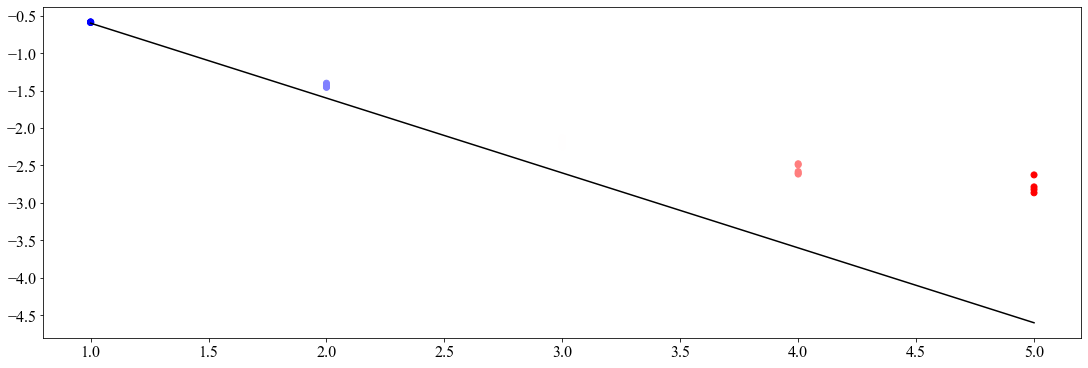

In [14]:
with plt.rc_context({"xtick.labelsize" : 16, "ytick.labelsize" : 16}):
    plt.figure(figsize=(15,5))
    plt.scatter(np.log10(runs_df_fix_prior.gamma_square), np.log10(np.sqrt(runs_df_fix_prior.mse_obs_decoded_mean_latents)), c=np.log10(runs_df_fix_prior.gamma_square), cmap="bwr")
    # plt.plot(np.linspace(1, 5.4), -np.linspace(0, 4.4), c="black", label='$y=x$')
    points = np.linspace(1, 5)
    plt.plot(points, -points+.4, c="black", label='$y=x$')

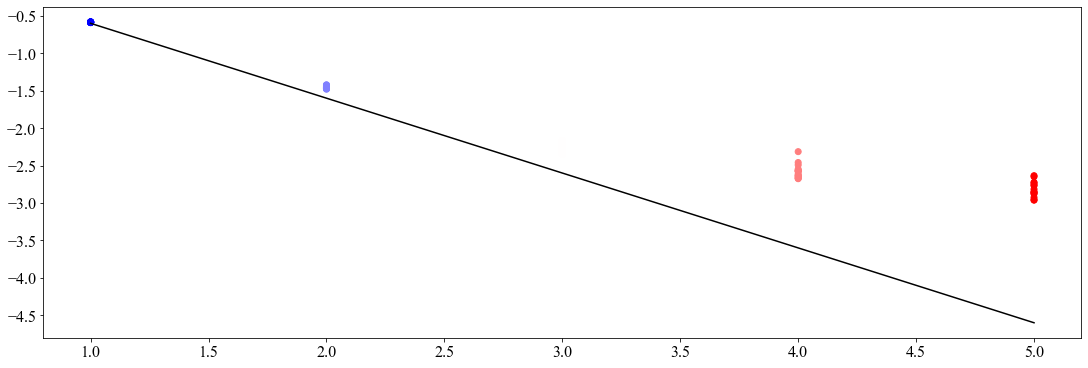

In [211]:
with plt.rc_context({"xtick.labelsize" : 16, "ytick.labelsize" : 16}):
    plt.figure(figsize=(15,5))
    plt.scatter(np.log10(runs_df_longer_more_seeds.gamma_square), np.log10(np.sqrt(runs_df_longer_more_seeds.mse_obs_decoded_mean_latents)), c=np.log10(runs_df_longer_more_seeds.gamma_square), cmap="bwr")
    # plt.plot(np.linspace(1, 5.4), -np.linspace(0, 4.4), c="black", label='$y=x$')
    points = np.linspace(1, 5)
    plt.plot(points, -points+.4, c="black", label='$y=x$')

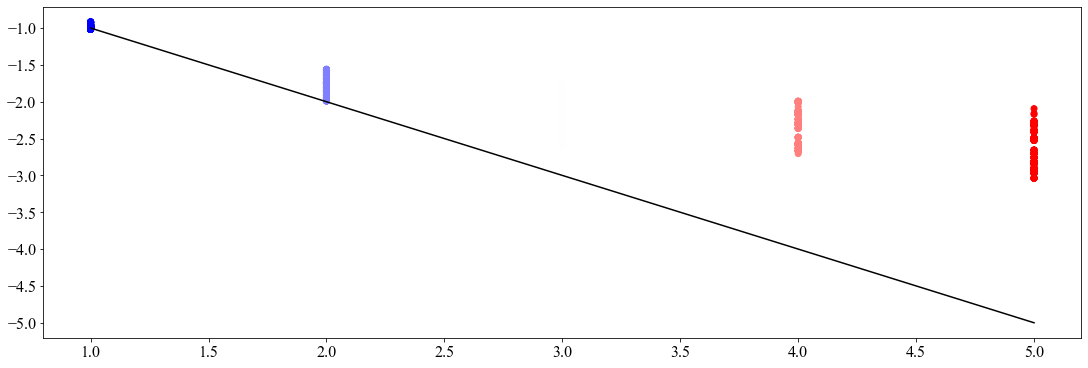

In [191]:
with plt.rc_context({"xtick.labelsize" : 16, "ytick.labelsize" : 16}):
    plt.figure(figsize=(15,5))
    plt.scatter(np.log10(runs_df.gamma_square), np.log10(np.sqrt(np.array(last_mse_obs))), c=np.log10(runs_df.gamma_square), cmap="bwr")
    plt.plot(np.linspace(1, 5), -np.linspace(1, 5), c="black", label='$y=x$')

In [161]:
runs_df

,name,dim,gamma_square,neg_elbo,kl_loss,rec_loss,prior,cima,mcc,min_cima,...,mse_obs_decoded_mean_latents,sigma_0,sigma_1,sigma_2,col_norm_sq_0,col_norm_sq_1,col_norm_sq_2,rhs_0,rhs_1,rhs_2
0,polar-sweep-900,3,100000.0,4.506658,-17.371023,12.864365,gaussian,0.002127,0.667338,0.002127,...,8.959971e-07,0.000051,0.000043,0.000029,0.195289,0.230890,0.344103,0.000051,0.000043,0.000029
1,glowing-sweep-899,3,100000.0,4.548226,-17.323889,12.775667,gaussian,0.002274,0.932238,0.001549,...,1.204116e-06,0.000027,0.000056,0.000024,0.379228,0.178303,0.416640,0.000026,0.000056,0.000024
2,gentle-sweep-898,3,100000.0,4.578268,-17.468391,12.890132,gaussian,0.001860,0.706717,0.001860,...,4.526402e-07,0.000028,0.000050,0.000044,0.351792,0.202082,0.231485,0.000028,0.000049,0.000043
3,fresh-sweep-897,3,100000.0,4.603677,-17.375402,12.771730,gaussian,0.002166,0.729366,0.002166,...,6.961896e-07,0.000025,0.000047,0.000022,0.402206,0.211825,0.441352,0.000025,0.000047,0.000023
4,faithful-sweep-895,3,100000.0,4.912837,-17.350199,12.437362,gaussian,0.001318,0.663609,0.001318,...,1.501070e-06,0.000054,0.000045,0.000030,0.187216,0.220139,0.328946,0.000053,0.000045,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,celestial-sweep-4,3,10.0,4.278215,-3.423313,-0.854902,gaussian,0.000277,0.869344,0.000209,...,1.109657e-02,0.218844,0.220859,0.210815,0.431691,0.384422,0.446208,0.188079,0.206432,0.183081
896,helpful-sweep-9,3,10.0,4.266787,-3.491180,-0.775606,gaussian,0.000181,0.864632,0.000090,...,1.011156e-02,0.170134,0.209501,0.165989,0.515388,0.435245,0.535475,0.162499,0.186830,0.157363
897,frosty-sweep-3,3,10.0,4.270438,-3.463290,-0.807149,gaussian,0.000541,0.707631,0.000221,...,1.095337e-02,0.236600,0.228190,0.229417,0.391013,0.387450,0.407140,0.203661,0.205149,0.197184
898,splendid-sweep-2,3,10.0,4.273918,-3.395372,-0.878547,gaussian,0.001877,0.660880,0.000164,...,1.108207e-02,0.283643,0.271619,0.245393,0.312418,0.338160,0.357272,0.242472,0.228227,0.218688


# Data Pre-processing

$$ \sigma_k^2 (x) = \left(-n''(\mu_k^\phi(x)) + \gamma^2 \left\Vert \left[ J_f(g(x))\right]_{:k}\right\Vert^2\right)^{-1} $$

In [202]:
def fig2(runs_df_filtered):
    df_rhs = pd.DataFrame(runs_df_filtered[[col for col in runs_df_filtered.columns if "rhs" in col]].stack().droplevel(1), columns=["rhs"])
    df_lhs = pd.DataFrame(runs_df_filtered[[col for col in runs_df_filtered.columns if "sigma" in col]].stack().droplevel(1), columns=["lhs"])
    df_rhs_lhs_gamma_sq = df_rhs.merge( df_lhs, left_index=True, right_index=True).merge(runs_df_filtered["gamma_square"], left_index=True, right_index=True)
    df_mse_sources_mean_decoded_sources = pd.DataFrame(runs_df_filtered[[col for col in runs_df_filtered.columns if col == "mse_sources_mean_decoded_sources"]].stack().droplevel(1), columns=["mse_sources_mean_decoded_sources"])
    df_mse_obs_decoded_mean_latents = pd.DataFrame(runs_df_filtered[[col for col in runs_df_filtered.columns if col == "mse_obs_decoded_mean_latents"]].stack().droplevel(1), columns=["mse_obs_decoded_mean_latents"])
    df_mse_gamma_sq = df_mse_sources_mean_decoded_sources.merge( df_mse_obs_decoded_mean_latents, left_index=True, right_index=True).merge(runs_df_filtered["gamma_square"], left_index=True, right_index=True)
    TICK_PADDING = 2
    LABELPAD = 0

    fig = plt.figure(figsize=(11,3))

    ax = fig.add_subplot(131)
    cmap = "coolwarm"
    im = ax.scatter(np.log10(df_rhs_lhs_gamma_sq.gamma_square), np.log10(df_rhs_lhs_gamma_sq.lhs), c=np.log10(df_rhs_lhs_gamma_sq.gamma_square), cmap=cmap)
    # ax.plot(np.linspace(.85, 6), -np.linspace(.85, 6), c="black", label='$y=x^{-2}$')
    ax.set_ylabel("$\log_{10}\sigma_k(x)^2$", labelpad=LABELPAD)
    ax.set_xlabel("$\log_{10}\gamma^2$", labelpad=LABELPAD)
    # plt.legend()
    ax.tick_params(axis='both', which='major', pad=TICK_PADDING)
    ax = fig.add_subplot(132)
    ax.scatter(np.log10(df_rhs_lhs_gamma_sq.lhs), np.log10(df_rhs_lhs_gamma_sq.rhs), c=np.log10(df_rhs_lhs_gamma_sq.gamma_square), cmap=cmap)
    # ax.plot(np.linspace(-6, 0.), np.linspace(-6, 0.), c="black", label='$y=x$')
    ax.set_ylabel("$\log_{10} RHS$", labelpad=LABELPAD)
    ax.set_xlabel("$\log_{10} LHS$", labelpad=LABELPAD)
    # plt.legend()
    ax.tick_params(axis='both', which='major', pad=TICK_PADDING)


    ax = fig.add_subplot(133)
    ax.scatter(np.log10(df_mse_gamma_sq.gamma_square), np.log10(np.sqrt(df_mse_gamma_sq.mse_obs_decoded_mean_latents)), c=np.log10(df_mse_gamma_sq.gamma_square), cmap=cmap)
    ax.plot(np.linspace(0, 5), -np.linspace(0, 5), c="black", label='$y=x$')
    ax.set_ylabel(r"$\log_{10}\Vert {\mathbf{\rm f}^\theta}(\mathbf{\mu}^{\hat{\phi}}(x)) - x \Vert_2$", labelpad=LABELPAD)

    ax.set_xlabel("$\log_{10}\gamma^2$", labelpad=LABELPAD)
    # plt.legend()
    ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

    cbar = fig.colorbar(im)
    # cbar.ax.set_yticklabels(['0','1','2','>3'])
    cbar.set_label('$\log_{10}\gamma^2$', rotation=270)
    cbar.ax.get_yaxis().labelpad = 10
    # plt.savefig("self_cons_mlp_gauss.svg")

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_48807/880756619.py:39: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im)


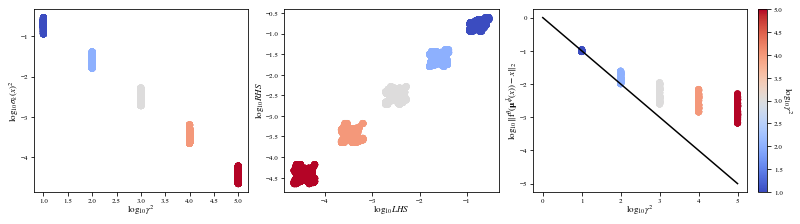

In [162]:
fig2(runs_df)

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_48807/3393078861.py:39: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im)


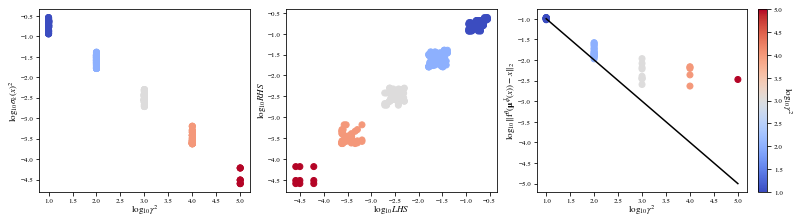

In [146]:
# encoder_extra_layers = [0,2,4]
# encoder_extra_width = [0, 15, 30]
# lrs = [.003,0.001, 0.0003, 0.0001]
fig2(runs_df[(run_encoder_extra_layers == 0) & (run_encoder_extra_width == 0)])

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_48807/3164943719.py:39: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im)


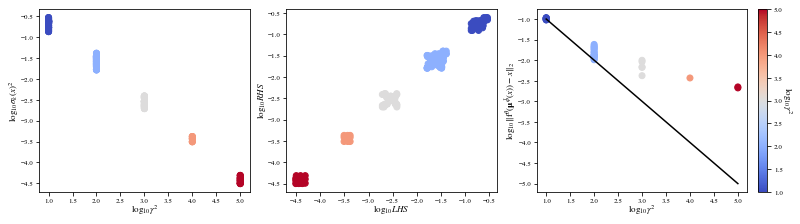

In [141]:
fig2(runs_df[(run_encoder_extra_layers == 0) & (run_encoder_extra_width == 30)])

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_48807/3393078861.py:39: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im)


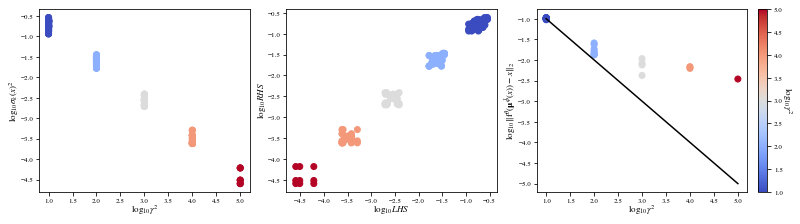

In [147]:
fig2(runs_df[(run_encoder_extra_layers == 4) & (run_encoder_extra_width == 30)])

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_48807/3164943719.py:39: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im)


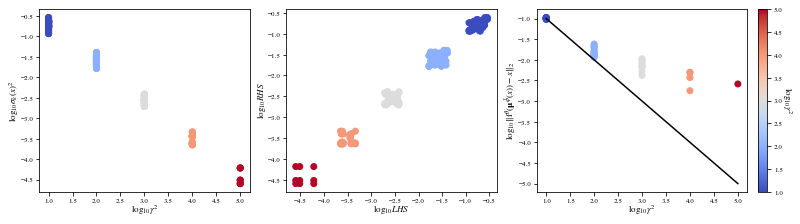

In [143]:
fig2(runs_df[(run_encoder_extra_layers == 0) & (run_encoder_extra_width == 15)])

# Sandbox

/Users/patrik.reizinger/Documents/GitHub/ima-vae/notebooks/./analysis.py:199: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


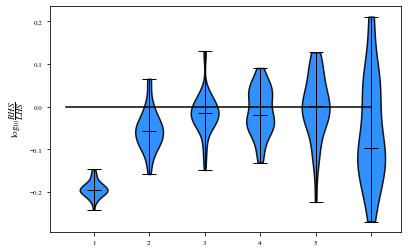

In [104]:
groups = [np.log10((g.rhs/g.lhs).abs()) for _, g in df_rhs_lhs_gamma_sq.groupby("gamma_square")]
create_violinplot(groups, '$\log_{10}\gamma^2$', '$\log_{10}\dfrac{RHS}{LHS}$', [0]+ sorted(np.log10(runs_df["gamma_square"]).astype(int).unique()), filename="opt_sigma_gamma")
plt.plot(np.linspace(0.5, 6), 0*np.linspace(0.5, 6), c="black")

In [608]:
elbo_filter = runs_df[[ "neg_elbo", "gamma_square"]].groupby("gamma_square").describe()['neg_elbo']['max']
groups = [g for _, g in runs_df[[ "neg_elbo", "mcc4min_neg_elbo", "cima4min_neg_elbo", "gamma_square"]].groupby("gamma_square")]
gg_mcc = [g[g.neg_elbo <= threshold].mcc4min_neg_elbo  for g, threshold in zip(groups, elbo_filter)]
gg_cima = [g[g.neg_elbo <= threshold].cima4min_neg_elbo  for g, threshold in zip(groups, elbo_filter)]
gg_gamma = [g[g.neg_elbo <= threshold].gamma_square  for g, threshold in zip(groups, elbo_filter)]

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_10088/2860315922.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


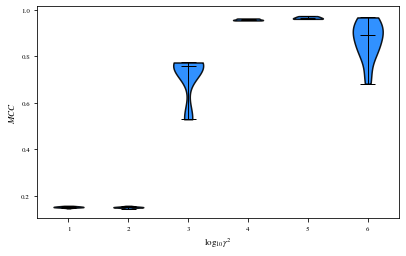

In [609]:
create_violinplot(gg_mcc, '$\log_{10}\gamma^2$', '$MCC$', [0]+ sorted(np.log10(runs_df["gamma_square"]).astype(int).unique()), filename="mcc_vs_gamma")

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_10088/2860315922.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


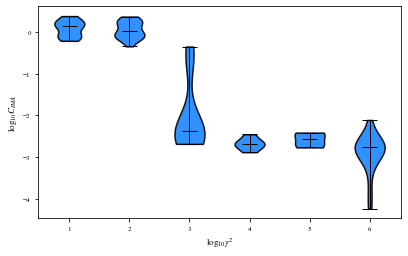

In [610]:
create_violinplot([np.log10(g) for g in gg_cima], '$\log_{10}\gamma^2$', '$\log_{10}C_{IMA}$', [0]+ sorted(np.log10(runs_df["gamma_square"]).astype(int).unique()), filename="cima_vs_gamma")

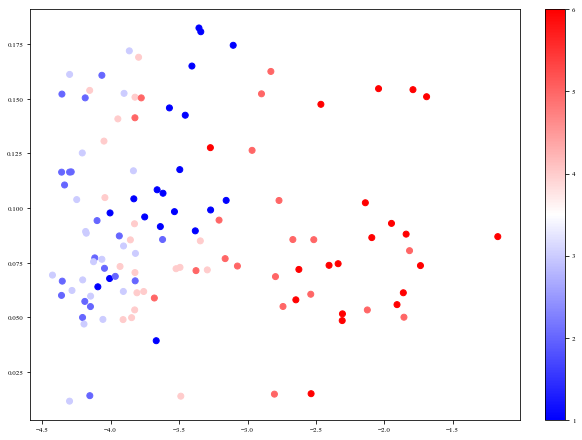

In [529]:
plt.figure(figsize=(8,6))
plt.scatter([np.log10(item) for sublist in gg_cima for item in sublist], [-np.log10(item) for sublist in gg_mcc for item in sublist], c=[np.log10(item) for sublist in gg_gamma for item in sublist], cmap=cmap)
plt.colorbar()

In [494]:
larger_gamma_df = runs_df[runs_df['gamma_square']>100]

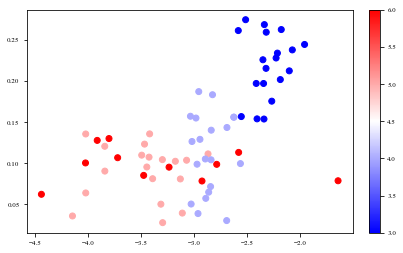

In [495]:
plt.scatter(np.log10(larger_gamma_df['cima4min_neg_elbo']), -np.log10(larger_gamma_df['mcc4min_neg_elbo']), c=np.log10(larger_gamma_df['gamma_square']), cmap=(
            '%s' % cmap))
plt.colorbar()

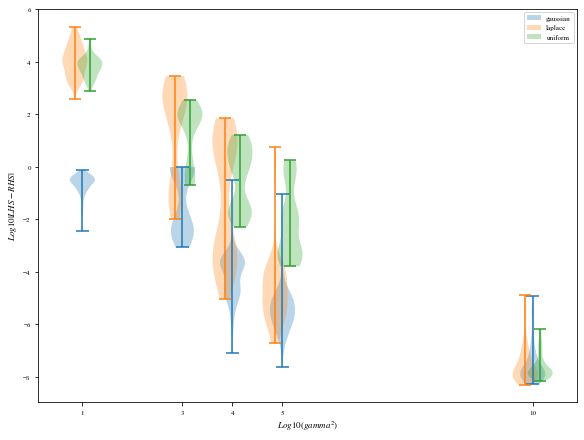

In [49]:
violin_by_prior(lhs_rhs_vs_gamma_gauss, lhs_rhs_vs_gamma_laplace, lhs_rhs_vs_gamma_uniform,  np.unique(np.log10(gamma_uniform_ext)), '$Log10(gamma^2)$', '$Log10|LHS-RHS|$',  0.15, 'opt_sigma_vs_gamma', log=True)